# Set Up Environment

In [1]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

## Import Dataset

In [2]:
df = pd.read_csv("gold_price_three.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Data Understanding

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP500,Crude Oil,USD Index
Date,,,,,,,,,
2005-08-31,431.200012,431.200012,431.200012,433.799988,433.799988,10,1220.329956,68.940002,87.580002
2005-09-01,438.500000,442.500000,438.500000,442.299988,442.299988,4,1221.589966,69.470001,86.550003
2005-09-02,444.200012,444.200012,444.200012,444.200012,444.200012,4,1218.020020,67.570000,86.300003
2005-09-06,444.399994,444.399994,444.399994,444.399994,444.399994,4,1233.390015,65.959999,86.570000
2005-09-07,444.700012,444.700012,444.700012,444.899994,444.899994,1006,1236.359985,64.370003,86.970001


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,SP500,Crude Oil,USD Index
Date,,,,,,,,,
2024-08-26,2509.899902,2523.100098,2509.100098,2517.699951,2517.699951,290,5616.839844,77.419998,100.849998
2024-08-27,2515.199951,2523.100098,2506.899902,2516.000000,2516.000000,100,5625.799805,75.529999,100.550003
2024-08-28,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2353,5592.180176,74.519997,101.089996
2024-08-29,2504.100098,2525.699951,2503.899902,2525.699951,2525.699951,3966,5591.959961,75.910004,101.339996
2024-08-30,2519.500000,2525.399902,2493.800049,2493.800049,2493.800049,208,5648.399902,73.550003,101.699997


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP500,Crude Oil,USD Index
count,4779.000000,4779.000000,4779.000000,4779.000000,4779.000000,4779.000000,4776.000000,4778.000000,4777.000000
mean,1347.430362,1354.347249,1340.187780,1347.341200,1347.341200,5002.388575,2333.895061,72.518041,89.627258
std,428.399148,430.615124,426.292668,428.488778,428.488778,26956.353236,1206.375352,21.715250,9.556644
min,431.200012,431.200012,431.200012,433.799988,433.799988,0.000000,676.530029,-37.630001,71.330002
25%,1119.300049,1125.449951,1111.600037,1118.200012,1118.200012,36.500000,1332.387512,55.982501,80.739998
50%,1297.300049,1303.699951,1292.599976,1297.699951,1297.699951,137.000000,2002.989990,71.785000,90.309998
75%,1705.799988,1714.200012,1694.450012,1704.900024,1704.900024,461.000000,2985.322510,89.025000,97.160004
max,2519.500000,2527.300049,2509.100098,2525.699951,2525.699951,386334.000000,5667.200195,145.289993,114.110001


Noticed that the values for Close and Adj Close price are totally same, may remove it in the next phase.

In [6]:
df.shape

(4779, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4779 entries, 2005-08-31 to 2024-08-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4779 non-null   float64
 1   High       4779 non-null   float64
 2   Low        4779 non-null   float64
 3   Close      4779 non-null   float64
 4   Adj Close  4779 non-null   float64
 5   Volume     4779 non-null   int64  
 6   SP500      4776 non-null   float64
 7   Crude Oil  4778 non-null   float64
 8   USD Index  4777 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 373.4 KB


In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SP500        3
Crude Oil    1
USD Index    2
dtype: int64

## Data Visualization

Here is the Historical Close Price of Gold and S&P500

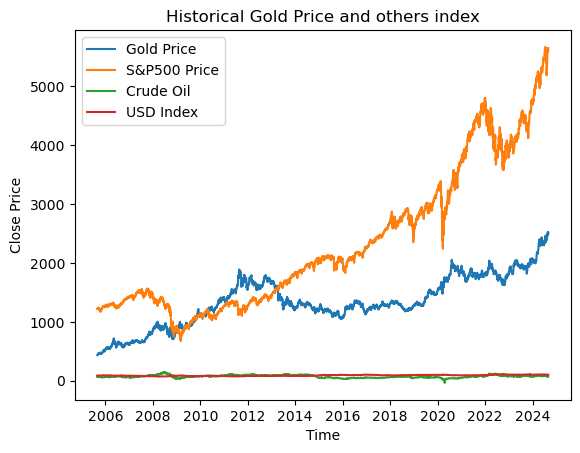

In [9]:
plt.plot(df.index, df.Close, label = 'Gold Price')
plt.plot(df.index, df.SP500, label = 'S&P500 Price')
plt.plot(df.index, df['Crude Oil'], label = 'Crude Oil')
plt.plot(df.index, df['USD Index'], label = 'USD Index')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Historical Gold Price and others index')
plt.legend()
plt.show()

The evolution of some features over time:

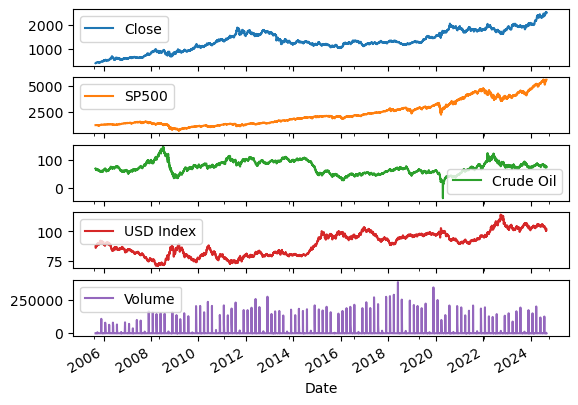

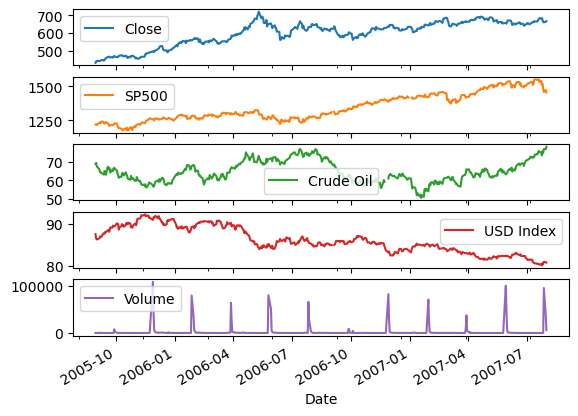

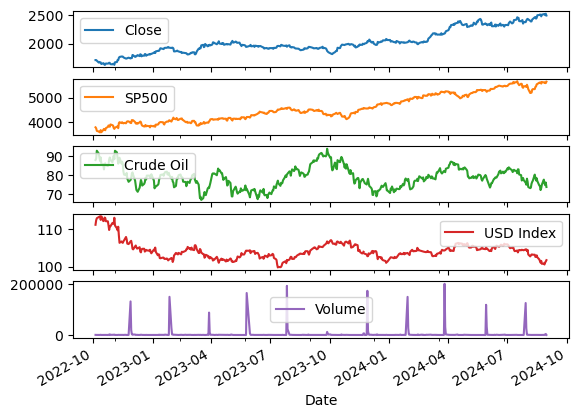

In [10]:
plot_cols = ['Close', 'SP500','Crude Oil', 'USD Index', 'Volume']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = df.index[:480]
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][-480:]
plot_features.index = df.index[-480:]
_ = plot_features.plot(subplots=True)

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


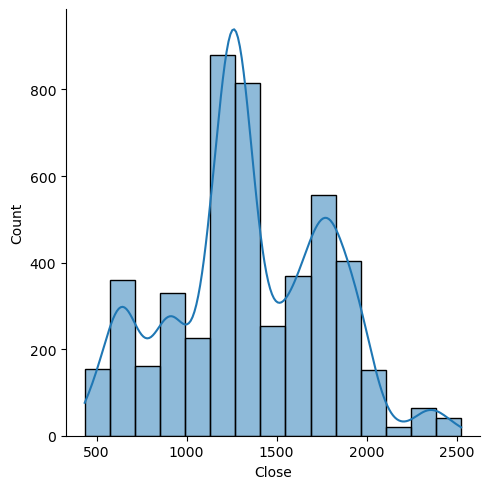

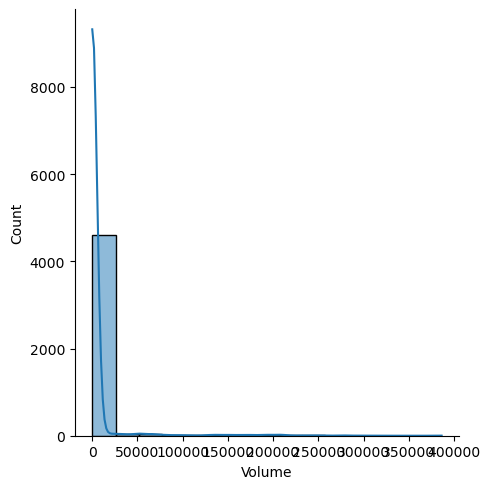

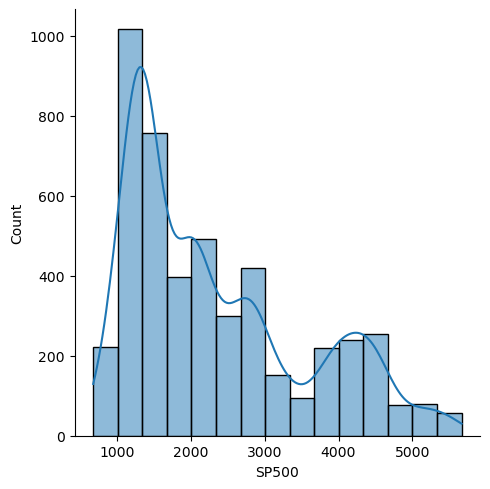

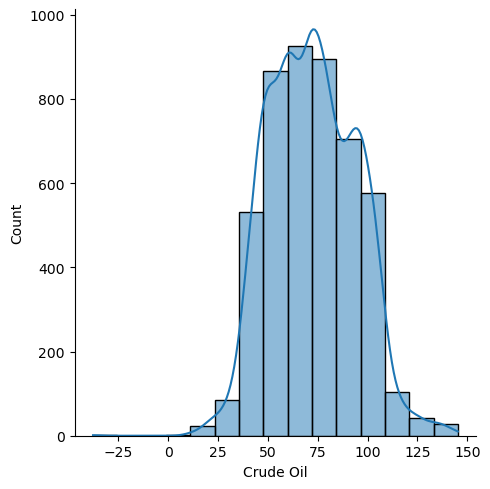

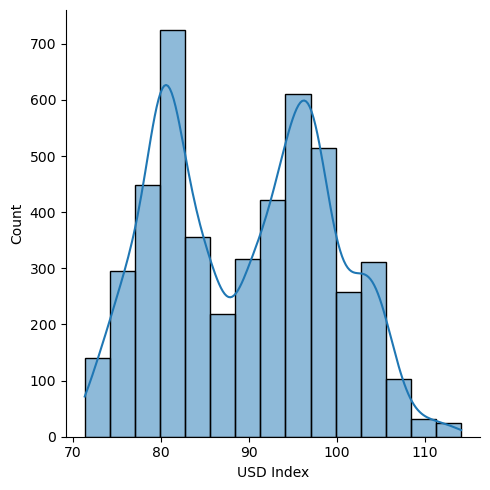

In [11]:
sns.displot(df.Close, kde=True, bins=15)
sns.displot(df.Volume, kde=True, bins=15)
sns.displot(df.SP500, kde=True, bins=15)
sns.displot(df['Crude Oil'], kde=True, bins=15)
sns.displot(df['USD Index'], kde=True, bins=15)

# Data Preparation

## Feature Selection
Since the Adj Close is totally same with Close, and the Volume is extremely skewed to the left, we have remove Adj Close and Volume in the dataset.

In [12]:
df.drop(['Adj Close'], axis=1, inplace = True)

In [13]:
df.head(3)

,Open,High,Low,Close,Volume,SP500,Crude Oil,USD Index
Date,,,,,,,,
2005-08-31,431.200012,431.200012,431.200012,433.799988,10,1220.329956,68.940002,87.580002
2005-09-01,438.500000,442.500000,438.500000,442.299988,4,1221.589966,69.470001,86.550003
2005-09-02,444.200012,444.200012,444.200012,444.200012,4,1218.020020,67.570000,86.300003


## Handling Missing Value
By forward fill the last known value

In [14]:
df = df.fillna(method='ffill')
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Volume       False
SP500        False
Crude Oil    False
USD Index    False
dtype: bool

### Split the Data into Train and Test set

In [15]:
# Define the split time
split_time = int(len(df) *0.8)

# Get the Train Set
train_df = df[:split_time]
train_date = df.index[:split_time]
print("Shape of Train set: ", train_df.shape)

# Get the Validation Set
test_df = df[split_time:]
test_date = df.index[split_time:]
print("Shape of Test set: ", test_df.shape)

Shape of Train set:  (3823, 8)
Shape of Test set:  (956, 8)


### Scaling Features to normalizing the range

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.fit_transform(test_df)
print("Sample of Scaled Train Df: \n",train_df_scaled)
print("\nSample of Scaled Test Df: \n",test_df_scaled)

Sample of Scaled Train Df: 
 [[0.         0.         0.         ... 0.18723894 0.58260445 0.50844807]
 [0.00452208 0.00692486 0.00453754 ... 0.18767278 0.58550189 0.47622033]
 [0.00805303 0.00796666 0.00808056 ... 0.18644359 0.57511483 0.46839805]
 ...
 [0.94431021 0.93884051 0.88009695 ... 0.98955343 0.42597859 0.66958705]
 [0.89704519 0.89110188 0.89507704 ... 0.98784219 0.43182814 0.67021273]
 [0.89673546 0.88711855 0.88531825 ... 0.99718344 0.43232016 0.6792866 ]]

Sample of Scaled Test Df: 
 [[0.2764987  0.28230083 0.28131987 ... 0.         0.01184633 0.1426833 ]
 [0.28539649 0.29513266 0.29272935 ... 0.02259887 0.         0.13457641]
 [0.28272712 0.2920354  0.2862416  ... 0.04220276 0.01447887 0.12687464]
 ...
 [0.97942387 0.97090703 0.99093949 ... 0.96478248 0.41151128 0.47223327]
 [0.98287187 0.99822998 0.99418323 ... 0.9646791  0.42814412 0.48236704]
 [1.         0.99789807 0.98288585 ... 0.99117436 0.39990432 0.49695968]]


### Prepare Features and Labels

In [17]:
# Split X and Y
def createXy(dataset, window_size):
    X = []
    y = []
    for i in range (window_size, len(dataset)):
        X.append(dataset[i-window_size:i, 0:dataset.shape[1]])
        y.append(dataset[i,0])
    return np.array(X), np.array(y)

X_train, y_train = createXy(train_df_scaled, 30)
X_test, y_test = createXy(test_df_scaled, 30)
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (3793, 30, 8)
y_train Shape:  (3793,)
X_test Shape:  (926, 30, 8)
y_test Shape:  (926,)


In case you provide a 30 days data of all the features, the close price of gold on 31st day will be the answer of the input.

In [18]:
print("with first 30 trading input X_train: \n", X_train[0])
print("the output on 31st is y_train: ", y_train[0])

with first 30 trading input X_train: 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.58843384e-05 1.87238937e-01 5.82604454e-01 5.08448075e-01]
 [4.52207635e-03 6.92486081e-03 4.53753596e-03 5.25437345e-03
  1.03537354e-05 1.87672778e-01 5.85501889e-01 4.76220327e-01]
 [8.05302614e-03 7.96666264e-03 8.08055700e-03 6.42889555e-03
  1.03537354e-05 1.86443589e-01 5.75114826e-01 4.68398049e-01]
 [8.17690751e-03 8.08921546e-03 8.20486188e-03 6.55251655e-03
  1.03537354e-05 1.91735722e-01 5.66313161e-01 4.76846004e-01]
 [8.36275791e-03 8.27307274e-03 8.39134765e-03 6.86159734e-03
  2.60396445e-03 1.92758330e-01 5.57620856e-01 4.89361697e-01]
 [9.60168501e-03 9.49871315e-03 9.63451027e-03 7.97429951e-03
  1.55306031e-05 1.91143509e-01 5.58276854e-01 4.91551925e-01]
 [1.10264436e-02 1.09081921e-02 1.10641397e-02 9.39606360e-03
  1.55306031e-05 1.94521225e-01 5.56035458e-01 4.86858511e-01]
 [1.14600757e-02 1.13371738e-02 1.14992542e-02 9.82878426e-03
  1.55306031e-05 1.94204

# Modelling

## LSTM - 1

In [19]:
# Reset states generated byu Keras
tf.keras.backend.clear_session()

# Build the model
lstm1_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Print the model summary
lstm1_model.summary()

D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          11,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,051 (125.20 KB)

 Trainable params: 32,051 (125.20 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
lstm1_model.compile(loss='mean_squared_error',
              optimizer= 'adam')
history = lstm1_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0465 - val_loss: 0.0016
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0020 - val_loss: 4.1065e-04
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0018 - val_loss: 6.0185e-04
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0017 - val_loss: 9.6713e-04
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0017 - val_loss: 5.3660e-04
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0016 - val_loss: 3.4894e-04
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0015 - val_loss: 6.6300e-04
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0013 - val_loss: 8.0944e-04
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0014 - val_loss: 4.6319e-04
Epoch 12/100
95/95 

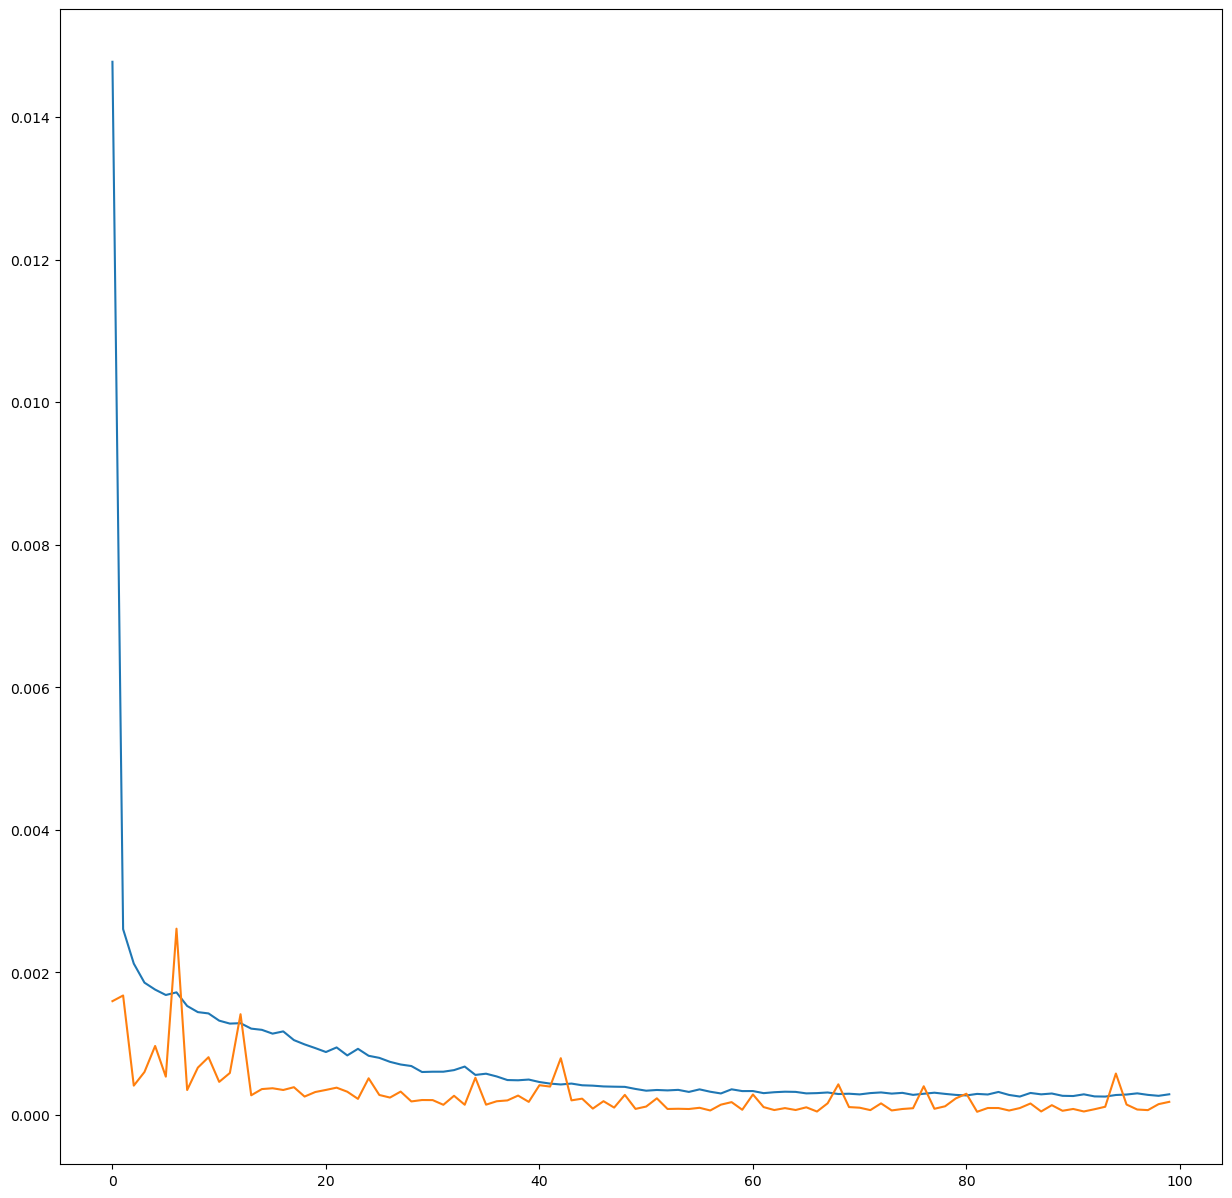

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,15))
plt.plot(range(100), loss, label="Training Loss")
plt.plot(range(100), val_loss, label="Validation Loss")
plt.show()

## LSTM - 2

In [22]:
# Reset states generated byu Keras
tf.keras.backend.clear_session()

# Build the model
lstm2_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

# Print the model summary
lstm2_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          18,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,777 (202.25 KB)

 Trainable params: 51,777 (202.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
lstm2_model.compile(loss='mean_squared_error',
              optimizer= 'adam')
history = lstm2_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0444 - val_loss: 0.0074
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0077 - val_loss: 0.0022
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0063 - val_loss: 0.0016
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0047 - val_loss: 0.0012
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0043 - val_loss: 5.6671e-04
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0032 - val_loss: 7.5218e-04
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0028 - val_loss: 8.1258e-04
Epoch 12/100
95/95 ━━━━━━━━━━━━━━━━━━━━

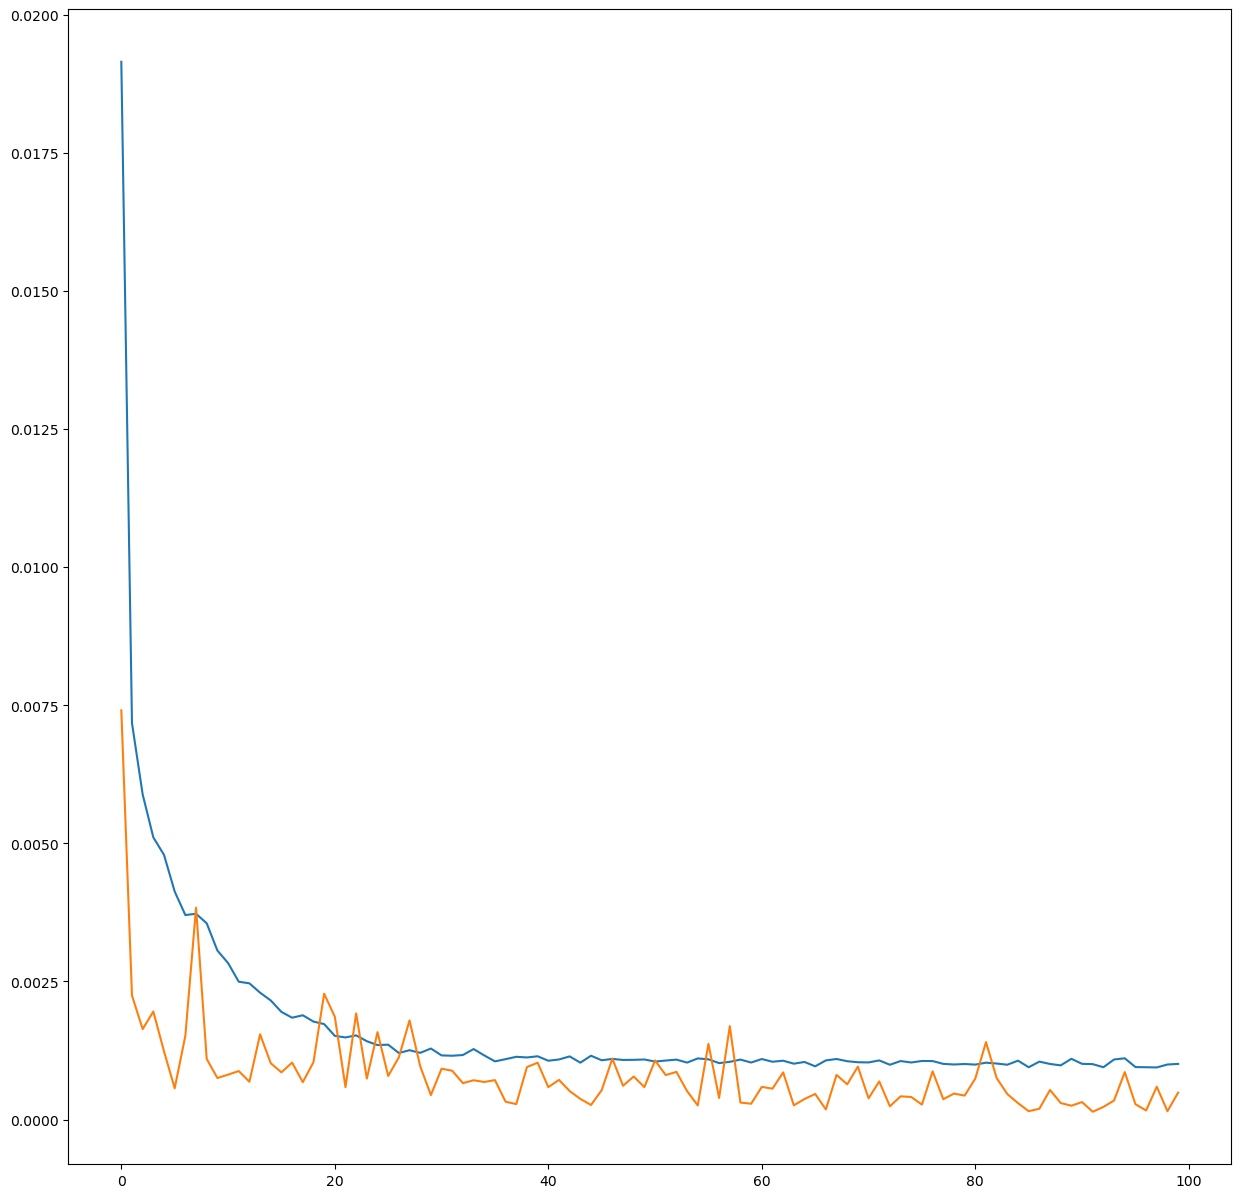

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,15))
plt.plot(range(100), loss, label="Training Loss")
plt.plot(range(100), val_loss, label="Validation Loss")
plt.show()

# 1D Convolutional Neural Network (CNN)

In [25]:
# Reset states generated byu Keras
tf.keras.backend.clear_session()

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, input_shape=(X_train.shape[1],X_train.shape[2]), activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

cnn_model.summary()

D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 12, 32)              │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,193 (78.88 KB)

 Trainable params: 20,193 (78.88 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
cnn_model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error as the loss function

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0237 - val_loss: 0.0011
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3367e-04 - val_loss: 8.2085e-04
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3657e-04 - val_loss: 6.2386e-04
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3381e-04 - val_loss: 6.3973e-04
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6865e-04 - val_loss: 0.0011
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3100e-04 - val_loss: 4.8565e-04
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7949e-04 - val_loss: 0.0011
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7886e-04 - val_loss: 4.9960e-04
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2622e-04 - val_loss: 4.5084e-04
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3150e-04 - val_loss: 8.9337e-04
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8521e-04 - val_loss: 4.

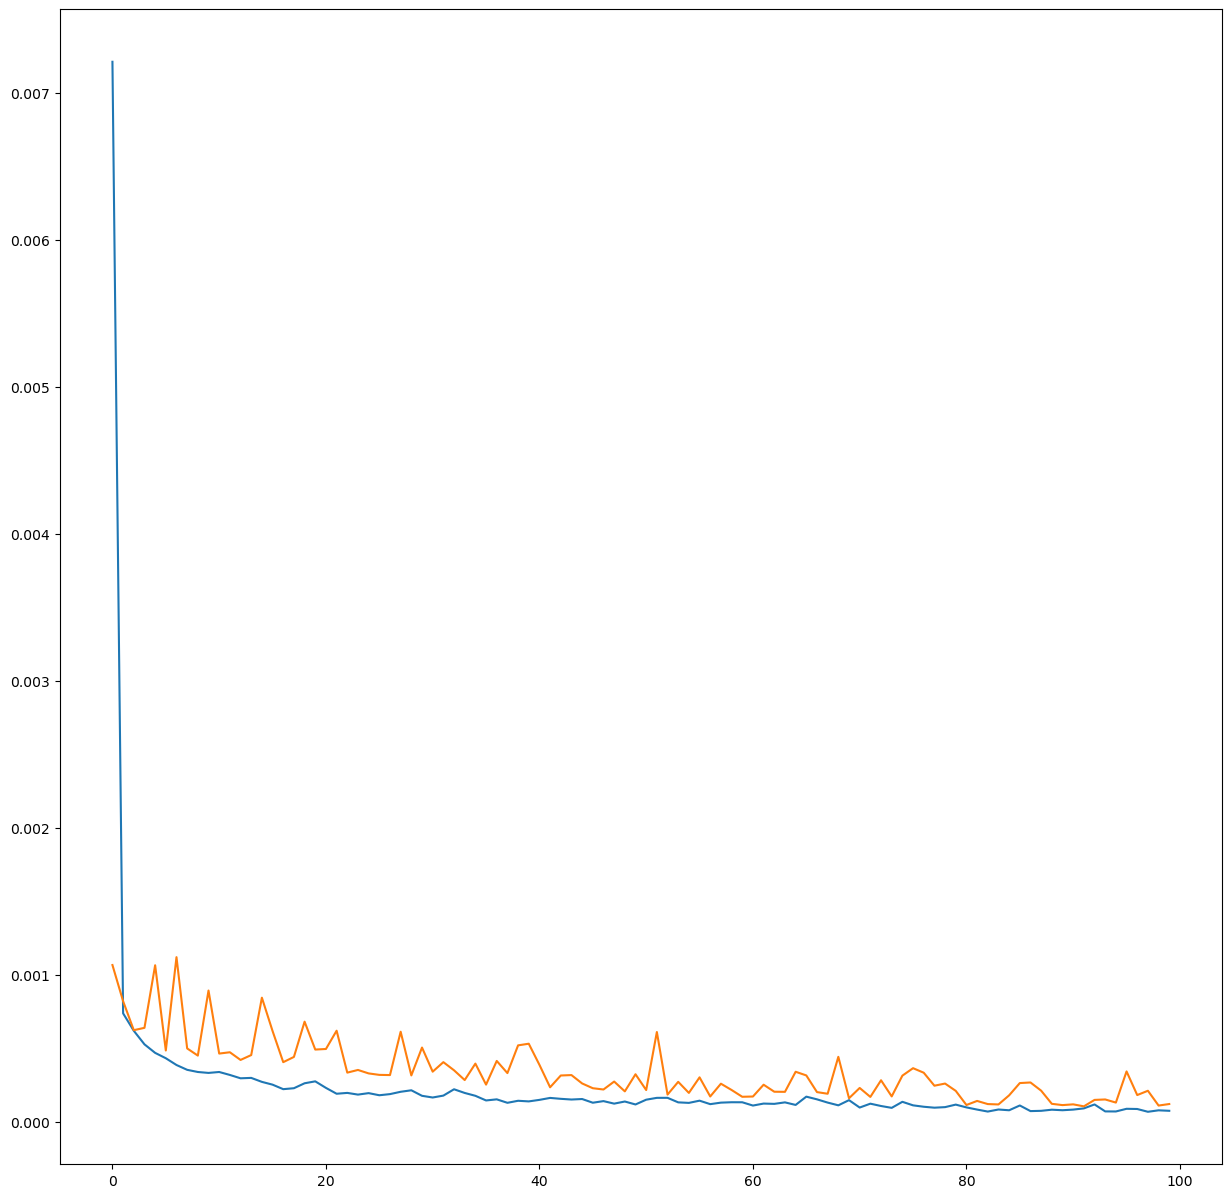

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,15))
plt.plot(range(100), loss, label="Training Loss")
plt.plot(range(100), val_loss, label="Validation Loss")
plt.show()

## CNN-LSTM

In [28]:
# Reset states generated byu Keras
tf.keras.backend.clear_session()

cnnlstm_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, input_shape=(X_train.shape[1],X_train.shape[2]), activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(100, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

cnnlstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,151 (274.03 KB)

 Trainable params: 70,151 (274.03 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
cnnlstm_model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error as the loss function

# Train the model
history = cnnlstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0479 - val_loss: 0.0014
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 7.4894e-04
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - val_loss: 4.7023e-04
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0011 - val_loss: 7.2969e-04
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 4.1777e-04
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.0669e-04 - val_loss: 4.1396e-04
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.1035e-04 - val_loss: 6.6865e-04
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.8898e-04 - val_loss: 4.9684e-04
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.7834e-04 - val_loss: 0.0014
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.2921e-04 - val_loss: 4.6610e-04

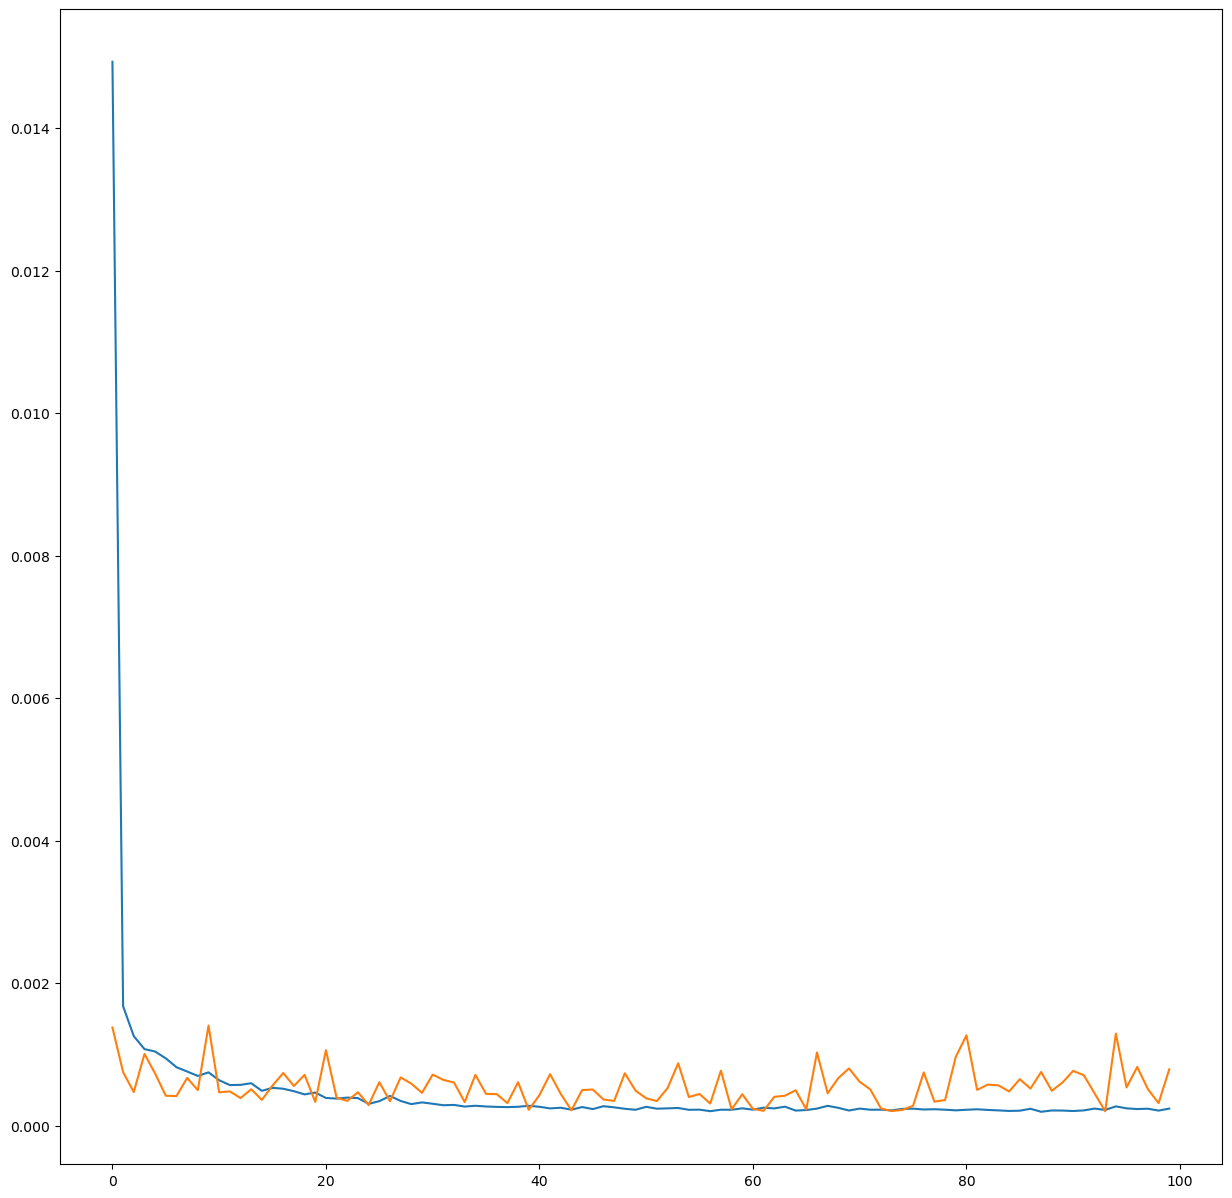

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,15))
plt.plot(range(100), loss, label="Training Loss")
plt.plot(range(100), val_loss, label="Validation Loss")
plt.show()

## Predict with Test Set

In [31]:
lstm1_predictions = lstm1_model.predict(X_test)
lstm2_predictions = lstm2_model.predict(X_test)
cnn_predictions = cnn_model.predict(X_test)
cnnlstm_predictions = cnnlstm_model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [32]:
lstm1_predictions_copy = np.repeat(lstm1_predictions, 8, axis=-1)
lstm1_predictions_inverse = scaler.inverse_transform(np.reshape(lstm1_predictions_copy, (len(lstm1_predictions),8)))[:,0]

lstm2_predictions_copy = np.repeat(lstm2_predictions, 8, axis=-1)
lstm2_predictions_inverse = scaler.inverse_transform(np.reshape(lstm2_predictions_copy, (len(lstm2_predictions),8)))[:,0]

cnn_predictions_copy = np.repeat(cnn_predictions, 8, axis=-1)
cnn_predictions_inverse = scaler.inverse_transform(np.reshape(cnn_predictions_copy, (len(cnn_predictions),8)))[:,0]

cnnlstm_predictions_copy = np.repeat(cnnlstm_predictions, 8, axis=-1)
cnnlstm_predictions_inverse = scaler.inverse_transform(np.reshape(cnnlstm_predictions_copy, (len(cnnlstm_predictions),8)))[:,0]

y_test_copy = np.repeat(y_test, 8, axis=-1)
y_test_inverse = scaler.inverse_transform(np.reshape(y_test_copy,(len(y_test),8)))[:,0]

print("Pred Values for LSTM - 1 -- " ,lstm1_predictions_inverse)
print("Pred Values for LSTM - 2 -- " ,lstm2_predictions_inverse)
print("Pred Values for CNN-- " ,cnn_predictions_inverse)
print("Pred Values for CNN-LSTM -- " ,cnnlstm_predictions_inverse)
print("\nOriginal Values-- " ,y_test_inverse)

Pred Values for LSTM - 1 --  [1892.6693 1895.5956 1897.7552 1904.7699 1910.0736 1944.2222 1966.0444
 1943.6912 1931.5607 1880.0707 1857.0951 1857.8807 1865.4365 1863.6559
 1848.7894 1844.7318 1864.8524 1879.3579 1874.4357 1871.9896 1869.3171
 1862.5101 1856.3735 1864.295  1869.5708 1854.5255 1848.3118 1819.4067
 1816.7277 1831.898  1847.2539 1856.5763 1848.3978 1836.6372 1819.8226
 1795.8042 1788.6433 1789.7212 1807.7616 1815.9015 1813.5142 1800.1779
 1764.1841 1744.4155 1739.3561 1732.9381 1722.8616 1709.5416 1698.13
 1708.7345 1723.3947 1734.5721 1729.2896 1734.172  1739.4346 1744.9764
 1746.9513 1750.945  1751.915  1743.3903 1742.7764 1739.7418 1738.9663
 1728.209  1706.9105 1706.8374 1721.7119 1733.2784 1746.332  1750.8975
 1760.255  1757.1749 1749.3116 1750.1892 1750.781  1762.8679 1780.7783
 1788.5015 1788.7766 1797.6213 1798.7974 1796.2659 1791.953  1791.6705
 1786.9785 1783.4971 1779.5316 1796.3212 1794.3275 1795.2434 1813.2286
 1841.2241 1853.8223 1853.0752 1842.1534 1836.0842

### Graph of Predictions

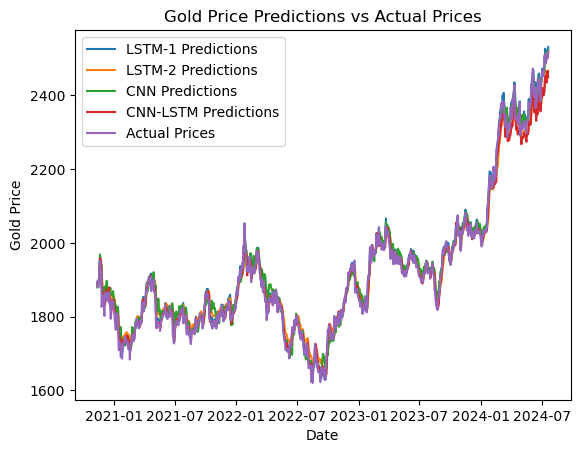

In [33]:
plt.plot(test_date[:-30], lstm1_predictions_inverse, label="LSTM-1 Predictions")
plt.plot(test_date[:-30], lstm2_predictions_inverse, label="LSTM-2 Predictions")
plt.plot(test_date[:-30], cnn_predictions_inverse, label="CNN Predictions")
plt.plot(test_date[:-30], cnnlstm_predictions_inverse, label="CNN-LSTM Predictions")
plt.plot(test_date[:-30], y_test_inverse, label="Actual Prices")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Predictions vs Actual Prices")
plt.legend()

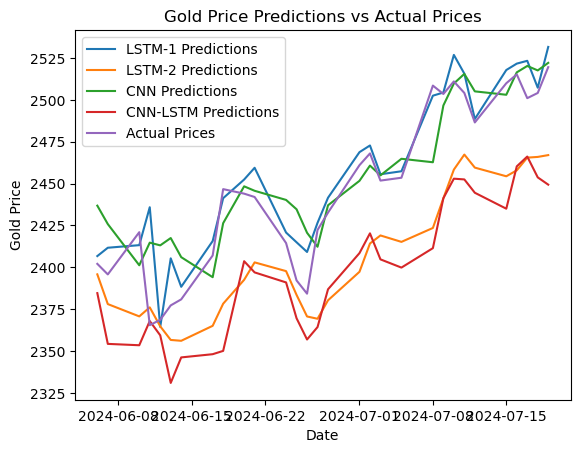

In [34]:
plt.plot(test_date[-60:-30], lstm1_predictions_inverse[-30:], label="LSTM-1 Predictions")
plt.plot(test_date[-60:-30], lstm2_predictions_inverse[-30:], label="LSTM-2 Predictions")
plt.plot(test_date[-60:-30], cnn_predictions_inverse[-30:], label="CNN Predictions")
plt.plot(test_date[-60:-30], cnnlstm_predictions_inverse[-30:], label="CNN-LSTM Predictions")
plt.plot(test_date[-60:-30], y_test_inverse[-30:], label="Actual Prices")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Predictions vs Actual Prices")
plt.legend()

# Evaluation Metrics

In [35]:
def calculate_rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true)**2))

rmse_lstm1 = calculate_rmse(lstm1_predictions_inverse, y_test_inverse)
rmse_lstm2 = calculate_rmse(lstm2_predictions_inverse, y_test_inverse)
rmse_cnn = calculate_rmse(cnn_predictions_inverse, y_test_inverse)
rmse_cnnlstm = calculate_rmse(cnnlstm_predictions_inverse, y_test_inverse)

print("The RMSE for LSTM - 1: ", rmse_lstm1)
print("The RMSE for LSTM - 2: ", rmse_lstm2)
print("The RMSE for CNN: ", rmse_cnn)
print("The RMSE for CNN-LSTM: ", rmse_cnnlstm)

The RMSE for LSTM - 1:  14.558877308708054
The RMSE for LSTM - 2:  26.056130617689035
The RMSE for CNN:  23.701366983635523
The RMSE for CNN-LSTM:  20.235452597535843


In [36]:
# Compute the MAE
print("The MAE for LSTM - 1: ",tf.keras.metrics.mean_absolute_error(y_test_inverse, lstm1_predictions_inverse).numpy())
print("The MAE for LSTM - 2: ",tf.keras.metrics.mean_absolute_error(y_test_inverse, lstm2_predictions_inverse).numpy())
print("The MAE for CNN: ",tf.keras.metrics.mean_absolute_error(y_test_inverse, cnn_predictions_inverse).numpy())
print("The MAE for CNN-LSTM: ",tf.keras.metrics.mean_absolute_error(y_test_inverse, cnnlstm_predictions_inverse).numpy())

The MAE for LSTM - 1:  11.526828
The MAE for LSTM - 2:  20.340298
The MAE for CNN:  18.562853
The MAE for CNN-LSTM:  14.283782


In [37]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

mape_lstm1 = calculate_mape(y_test_inverse, lstm1_predictions_inverse)
mape_lstm2 = calculate_mape(y_test_inverse, lstm2_predictions_inverse)
mape_cnn = calculate_mape(y_test_inverse, cnn_predictions_inverse)
mape_cnnlstm = calculate_mape(y_test_inverse, cnnlstm_predictions_inverse)

print("The MAPE for LSTM - 1: ", mape_lstm1)
print("The MAPE for LSTM - 2: ", mape_lstm2)
print("The MAPE for CNN: ", mape_cnn)
print("The MAPE for CNN-LSTM: ", mape_cnnlstm)

The MAPE for LSTM - 1:  0.6025942174482501
The MAPE for LSTM - 2:  1.060046959772733
The MAPE for CNN:  0.9812126655824659
The MAPE for CNN-LSTM:  0.7149573248061433


# Save the Model for Deployment

In [38]:
# import tensorflow as tf
# import joblib

# lstm1_model.save('lstm_model.h5')
# joblib.dump(scaler, 'scaler.pkl')